In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import missingno as msng

### Load Dataset

In [2]:
df=pd.read_csv('Storage-bc00-s1-030.csv')

In [3]:
df

,TimeDeltaIndex,Time_s,P_chargeSP_kW,P_dischargeSP_kW,P_chargeDischarge_kW,T_in_degC,T_out_degC,MFR_kg_s,T_storage1_degC,T_storage2_degC,...,T_storage6_degC,T_storage7_degC,T_storage8_degC,T_storage9_degC,T_storage10_degC,T_ext_degC,P_demand_kW,T_supply_degC,T_return_degC,anomaly
0,0,0.0,0.0,0.0,62.18,80.00,79.79,70.0,80.00,80.00,...,80.00,80.00,80.00,80.00,353.15,5.43,2309.02,79.79,50.0,0
1,600,600.0,0.0,0.0,61.26,80.00,79.79,70.0,79.95,79.96,...,79.99,80.00,80.00,80.00,353.15,5.42,2301.24,79.79,50.0,0
2,1200,1200.0,0.0,0.0,59.71,80.00,79.79,70.0,79.93,79.94,...,79.98,79.98,79.99,79.99,353.15,5.42,2293.46,79.79,50.0,0
3,1800,1800.0,0.0,0.0,56.01,79.99,79.79,70.0,79.91,79.93,...,79.96,79.97,79.98,79.98,353.14,5.41,2285.68,79.79,50.0,0
4,2400,2400.0,0.0,0.0,51.56,79.97,79.80,70.0,79.90,79.91,...,79.95,79.96,79.96,79.97,353.12,5.41,2277.90,79.80,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,2416200,2416204.0,0.0,0.0,0.00,56.64,80.36,0.0,79.49,79.12,...,75.09,72.65,69.71,66.52,336.43,2.53,2875.61,81.23,50.0,1
4028,2416800,2416804.0,0.0,0.0,0.00,56.64,80.38,0.0,79.48,79.12,...,75.09,72.65,69.71,66.51,336.43,2.47,2869.71,81.27,50.0,1
4029,2417400,2417404.0,0.0,0.0,0.00,56.64,80.39,0.0,79.48,79.12,...,75.09,72.65,69.71,66.51,336.43,2.40,2863.80,81.30,50.0,1
4030,2418000,2418004.0,0.0,0.0,0.00,56.64,80.41,0.0,79.48,79.12,...,75.08,72.65,69.71,66.51,336.43,2.33,2857.90,81.33,50.0,1


    Column name	                  Description

    TimeDeltaIndex
    Time_s                        Exact time of the datapoint recorded [s]
    P_chargeSP_kW                 Setpoint SP for charge [kW]
    P_dischargeSP_kW              Setpoint SP for discharge [kW]
    P_chargeDischarge_kW          Actual discharging power if positive, charging if negative [kW]
    T_in_degC                     Temperature at storage inlet [°C]
    T_out_degC                    Temperature at storage outlet [°C]
    MFR_kg_s                      Charge/discharge mass flow rate [kg/s]
    T_storage1_degC               Temperature at sensor 1 in storage [°C]
    T_storage2_degC               Temperature at sensor 2 in storage [°C]
    T_storage3_degC               Temperature at sensor 3 in storage [°C]
    T_storage4_degC               Temperature at sensor 4 in storage [°C]
    T_storage5_degC               Temperature at sensor 5 in storage [°C]
    T_storage6_degC               Temperature at sensor 6 in storage [°C]
    T_storage7_degC               Temperature at sensor 7 in storage [°C]
    T_storage8_degC               Temperature at sensor 8 in storage [°C]
    T_storage9_degC               Temperature at sensor 9 in storage [°C]
    T_storage10_degC              Temperature at sensor 10 in storage [°C]
    T_ext_degC                    External (ambiant) temperature [°C]
    P_demand_kW                   Network thermal load [kW]
    T_supply_degC                 Network supply temperature [°C]
    T_return_degC                 Network return temperature [°C]
    anomaly                       Presence of a fault (0: no fault, 1: fault)

In [4]:
df['TimeDeltaIndex']=pd.to_timedelta(df['TimeDeltaIndex'],unit='S')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   TimeDeltaIndex        4032 non-null   timedelta64[ns]
 1   Time_s                4032 non-null   float64        
 2   P_chargeSP_kW         4032 non-null   float64        
 3   P_dischargeSP_kW      4032 non-null   float64        
 4   P_chargeDischarge_kW  4032 non-null   float64        
 5   T_in_degC             4032 non-null   float64        
 6   T_out_degC            4032 non-null   float64        
 7   MFR_kg_s              4032 non-null   float64        
 8   T_storage1_degC       4032 non-null   float64        
 9   T_storage2_degC       4032 non-null   float64        
 10  T_storage3_degC       4032 non-null   float64        
 11  T_storage4_degC       4032 non-null   float64        
 12  T_storage5_degC       4032 non-null   float64        
 13  T_s

### Null Values

In [6]:
df.isna().sum()

TimeDeltaIndex          0
Time_s                  0
P_chargeSP_kW           0
P_dischargeSP_kW        0
P_chargeDischarge_kW    0
T_in_degC               0
T_out_degC              0
MFR_kg_s                0
T_storage1_degC         0
T_storage2_degC         0
T_storage3_degC         0
T_storage4_degC         0
T_storage5_degC         0
T_storage6_degC         0
T_storage7_degC         0
T_storage8_degC         0
T_storage9_degC         0
T_storage10_degC        0
T_ext_degC              0
P_demand_kW             0
T_supply_degC           0
T_return_degC           0
anomaly                 0
dtype: int64

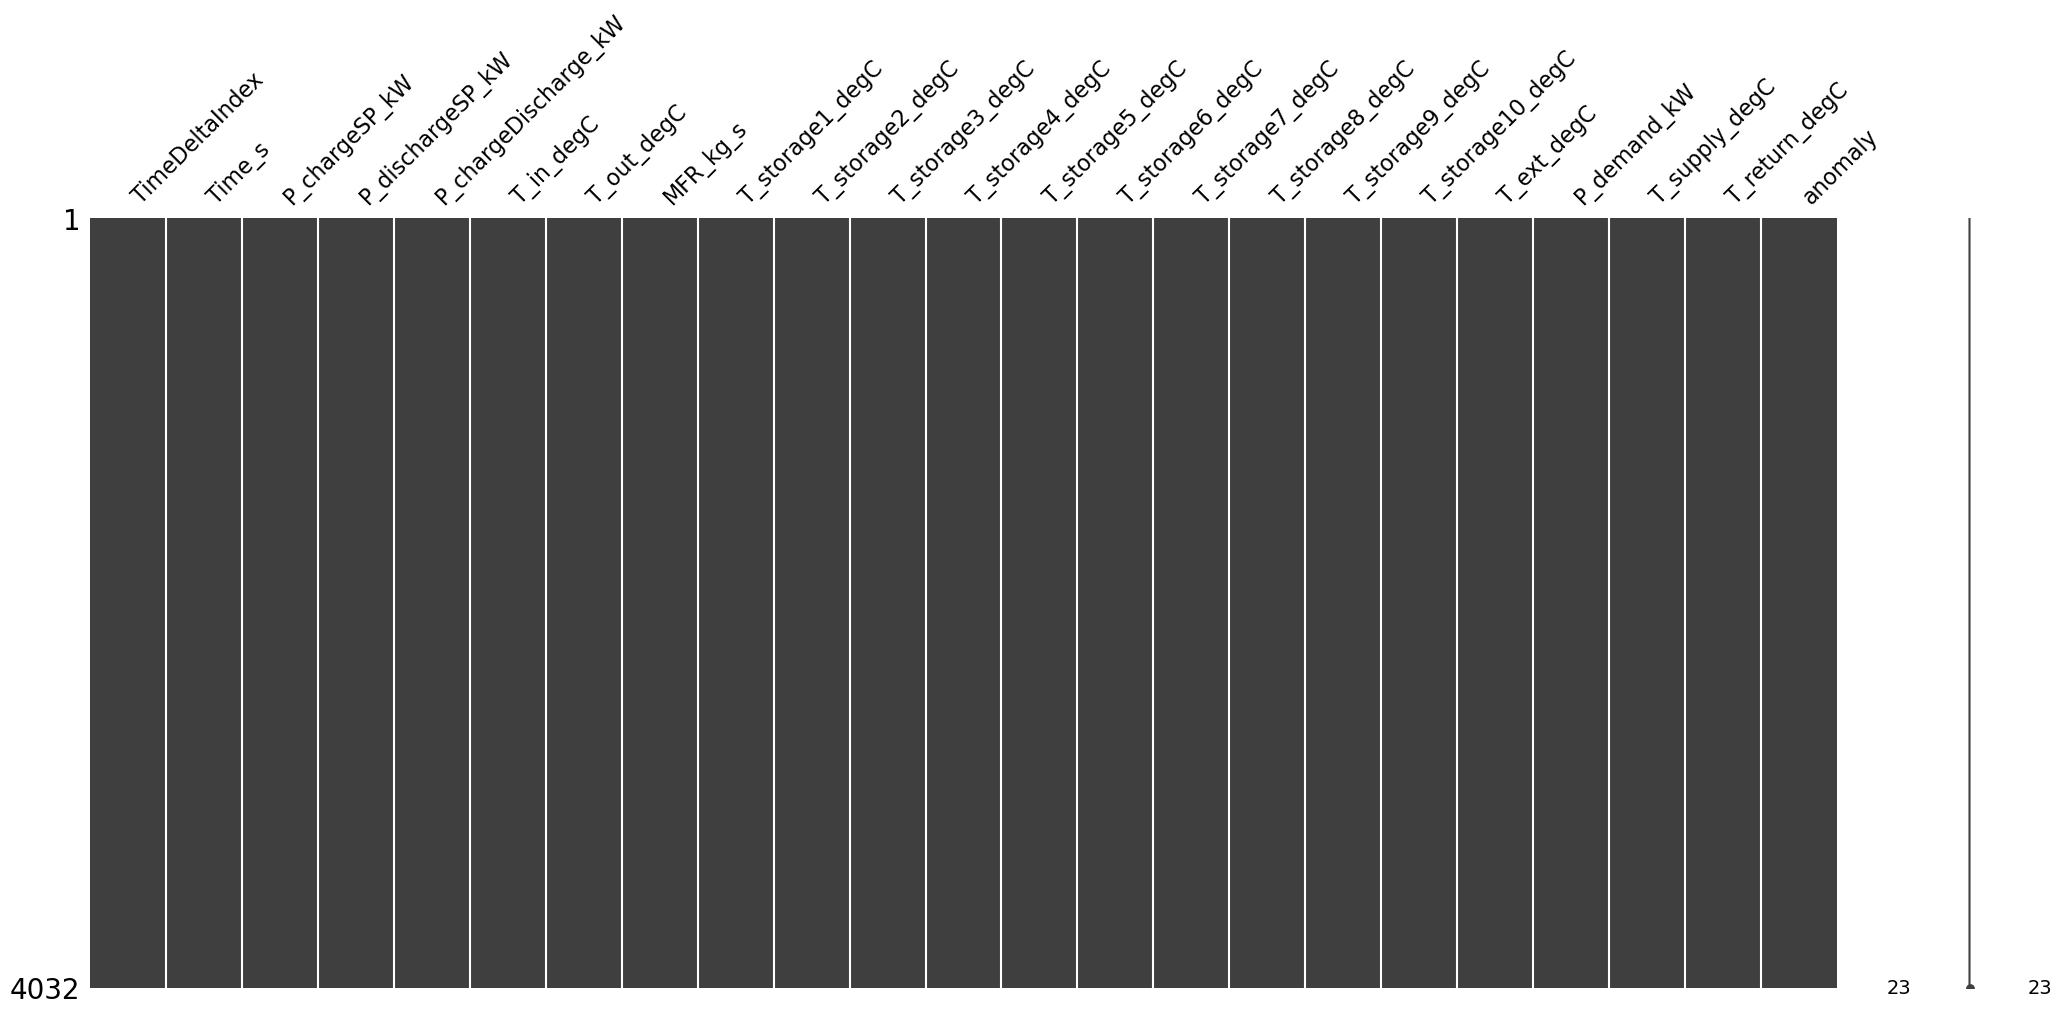

In [7]:
msng.matrix(df)
plt.show()

    No any missing values

### EDA

In [8]:
df['anomaly'].unique()

array([0, 1], dtype=int64)

In [9]:
df['anomaly'].value_counts()

1    2064
0    1968
Name: anomaly, dtype: int64

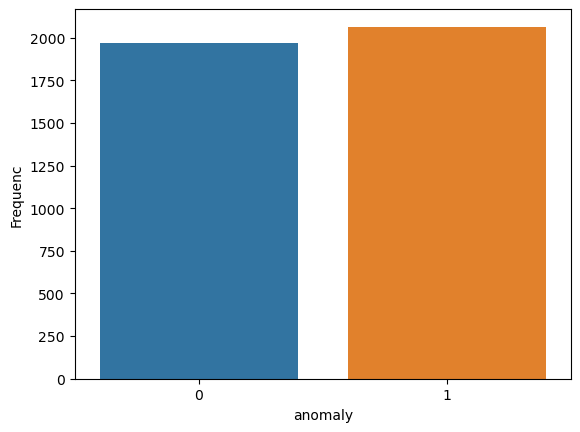

In [10]:
X=['No Fault','Fault']
sns.countplot(df['anomaly'])
plt.ylabel('Frequenc')

plt.show()

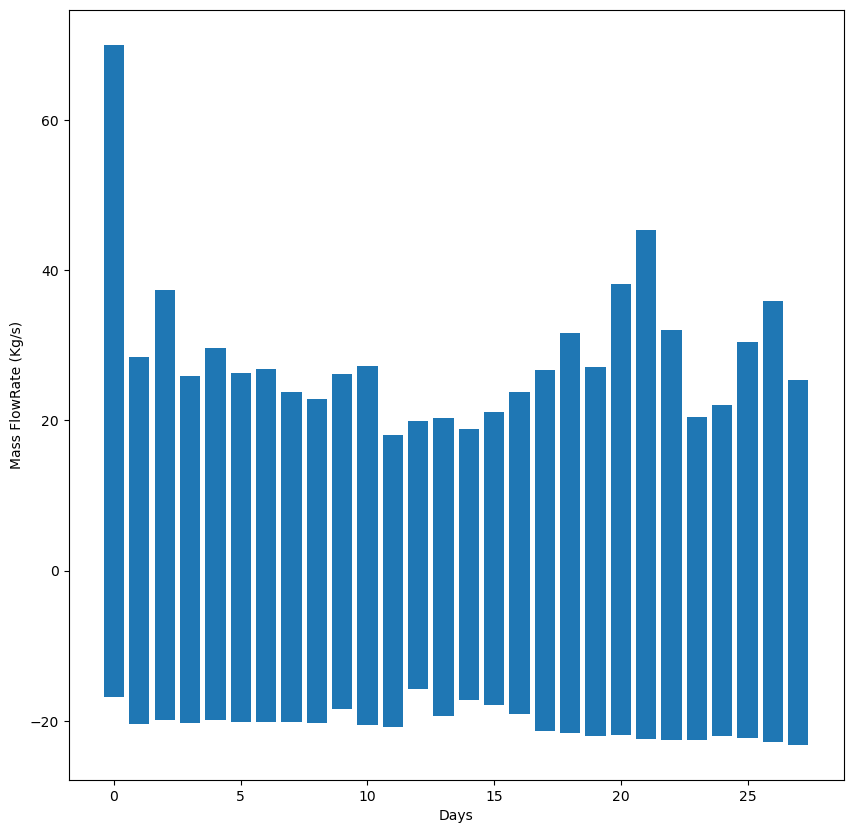

In [11]:
plt.figure(figsize=(10,10))
plt.bar(df.TimeDeltaIndex.dt.days,df.MFR_kg_s)
plt.xlabel('Days')
plt.ylabel(r'Mass FlowRate (Kg/s)')
plt.show()

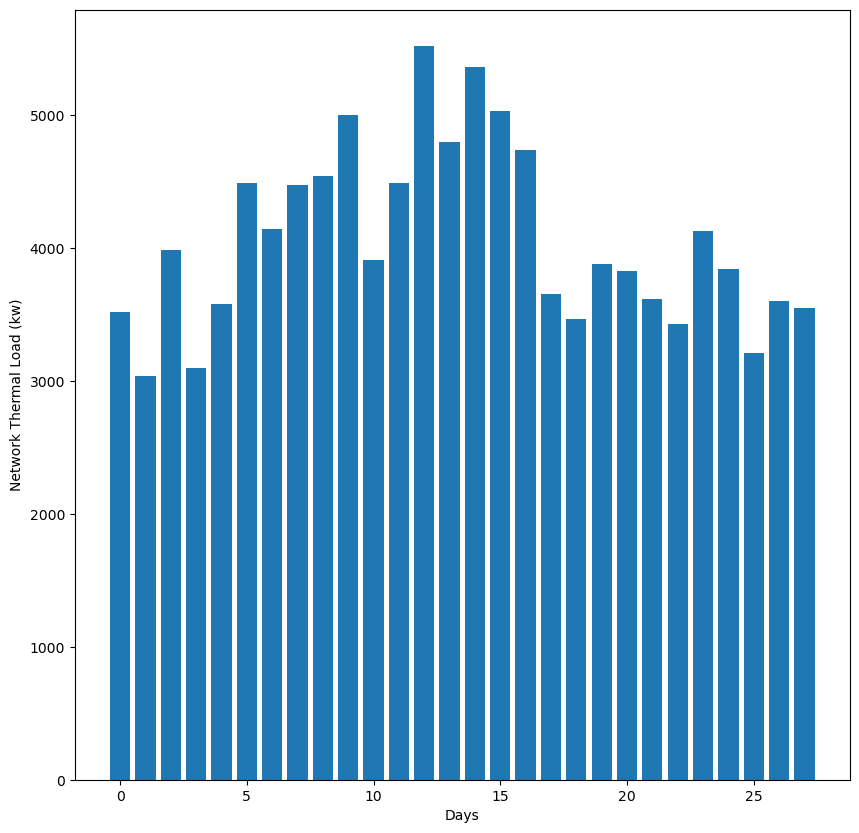

In [12]:
plt.figure(figsize=(10,10))
plt.bar(df.TimeDeltaIndex.dt.days,df.P_demand_kW)
plt.xlabel('Days')
plt.ylabel(r'Network Thermal Load (kw)')
plt.show()

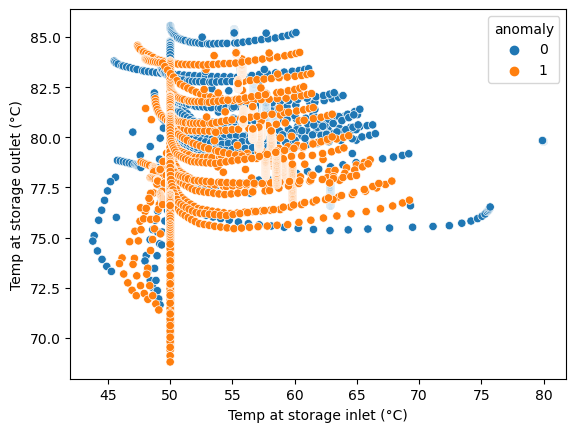

In [13]:
sns.scatterplot(df.T_in_degC,df.T_out_degC,hue=df.anomaly)
plt.xlabel(r'Temp at storage inlet (°C)')
plt.ylabel(r'Temp at storage outlet (°C)')
plt.show()

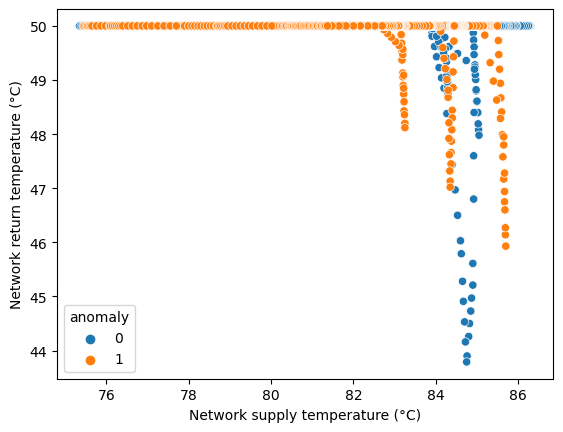

In [14]:
sns.scatterplot(df.T_supply_degC,df.T_return_degC,hue=df.anomaly)
plt.xlabel(r'Network supply temperature (°C)')
plt.ylabel(r'Network return temperature (°C)')
plt.show()

In [15]:
df_sensor=df[['T_storage1_degC', 'T_storage2_degC', 'T_storage3_degC',
       'T_storage4_degC', 'T_storage5_degC', 'T_storage6_degC',
       'T_storage7_degC', 'T_storage8_degC', 'T_storage9_degC',
       'T_storage10_degC','anomaly']]

<Figure size 1000x1000 with 0 Axes>

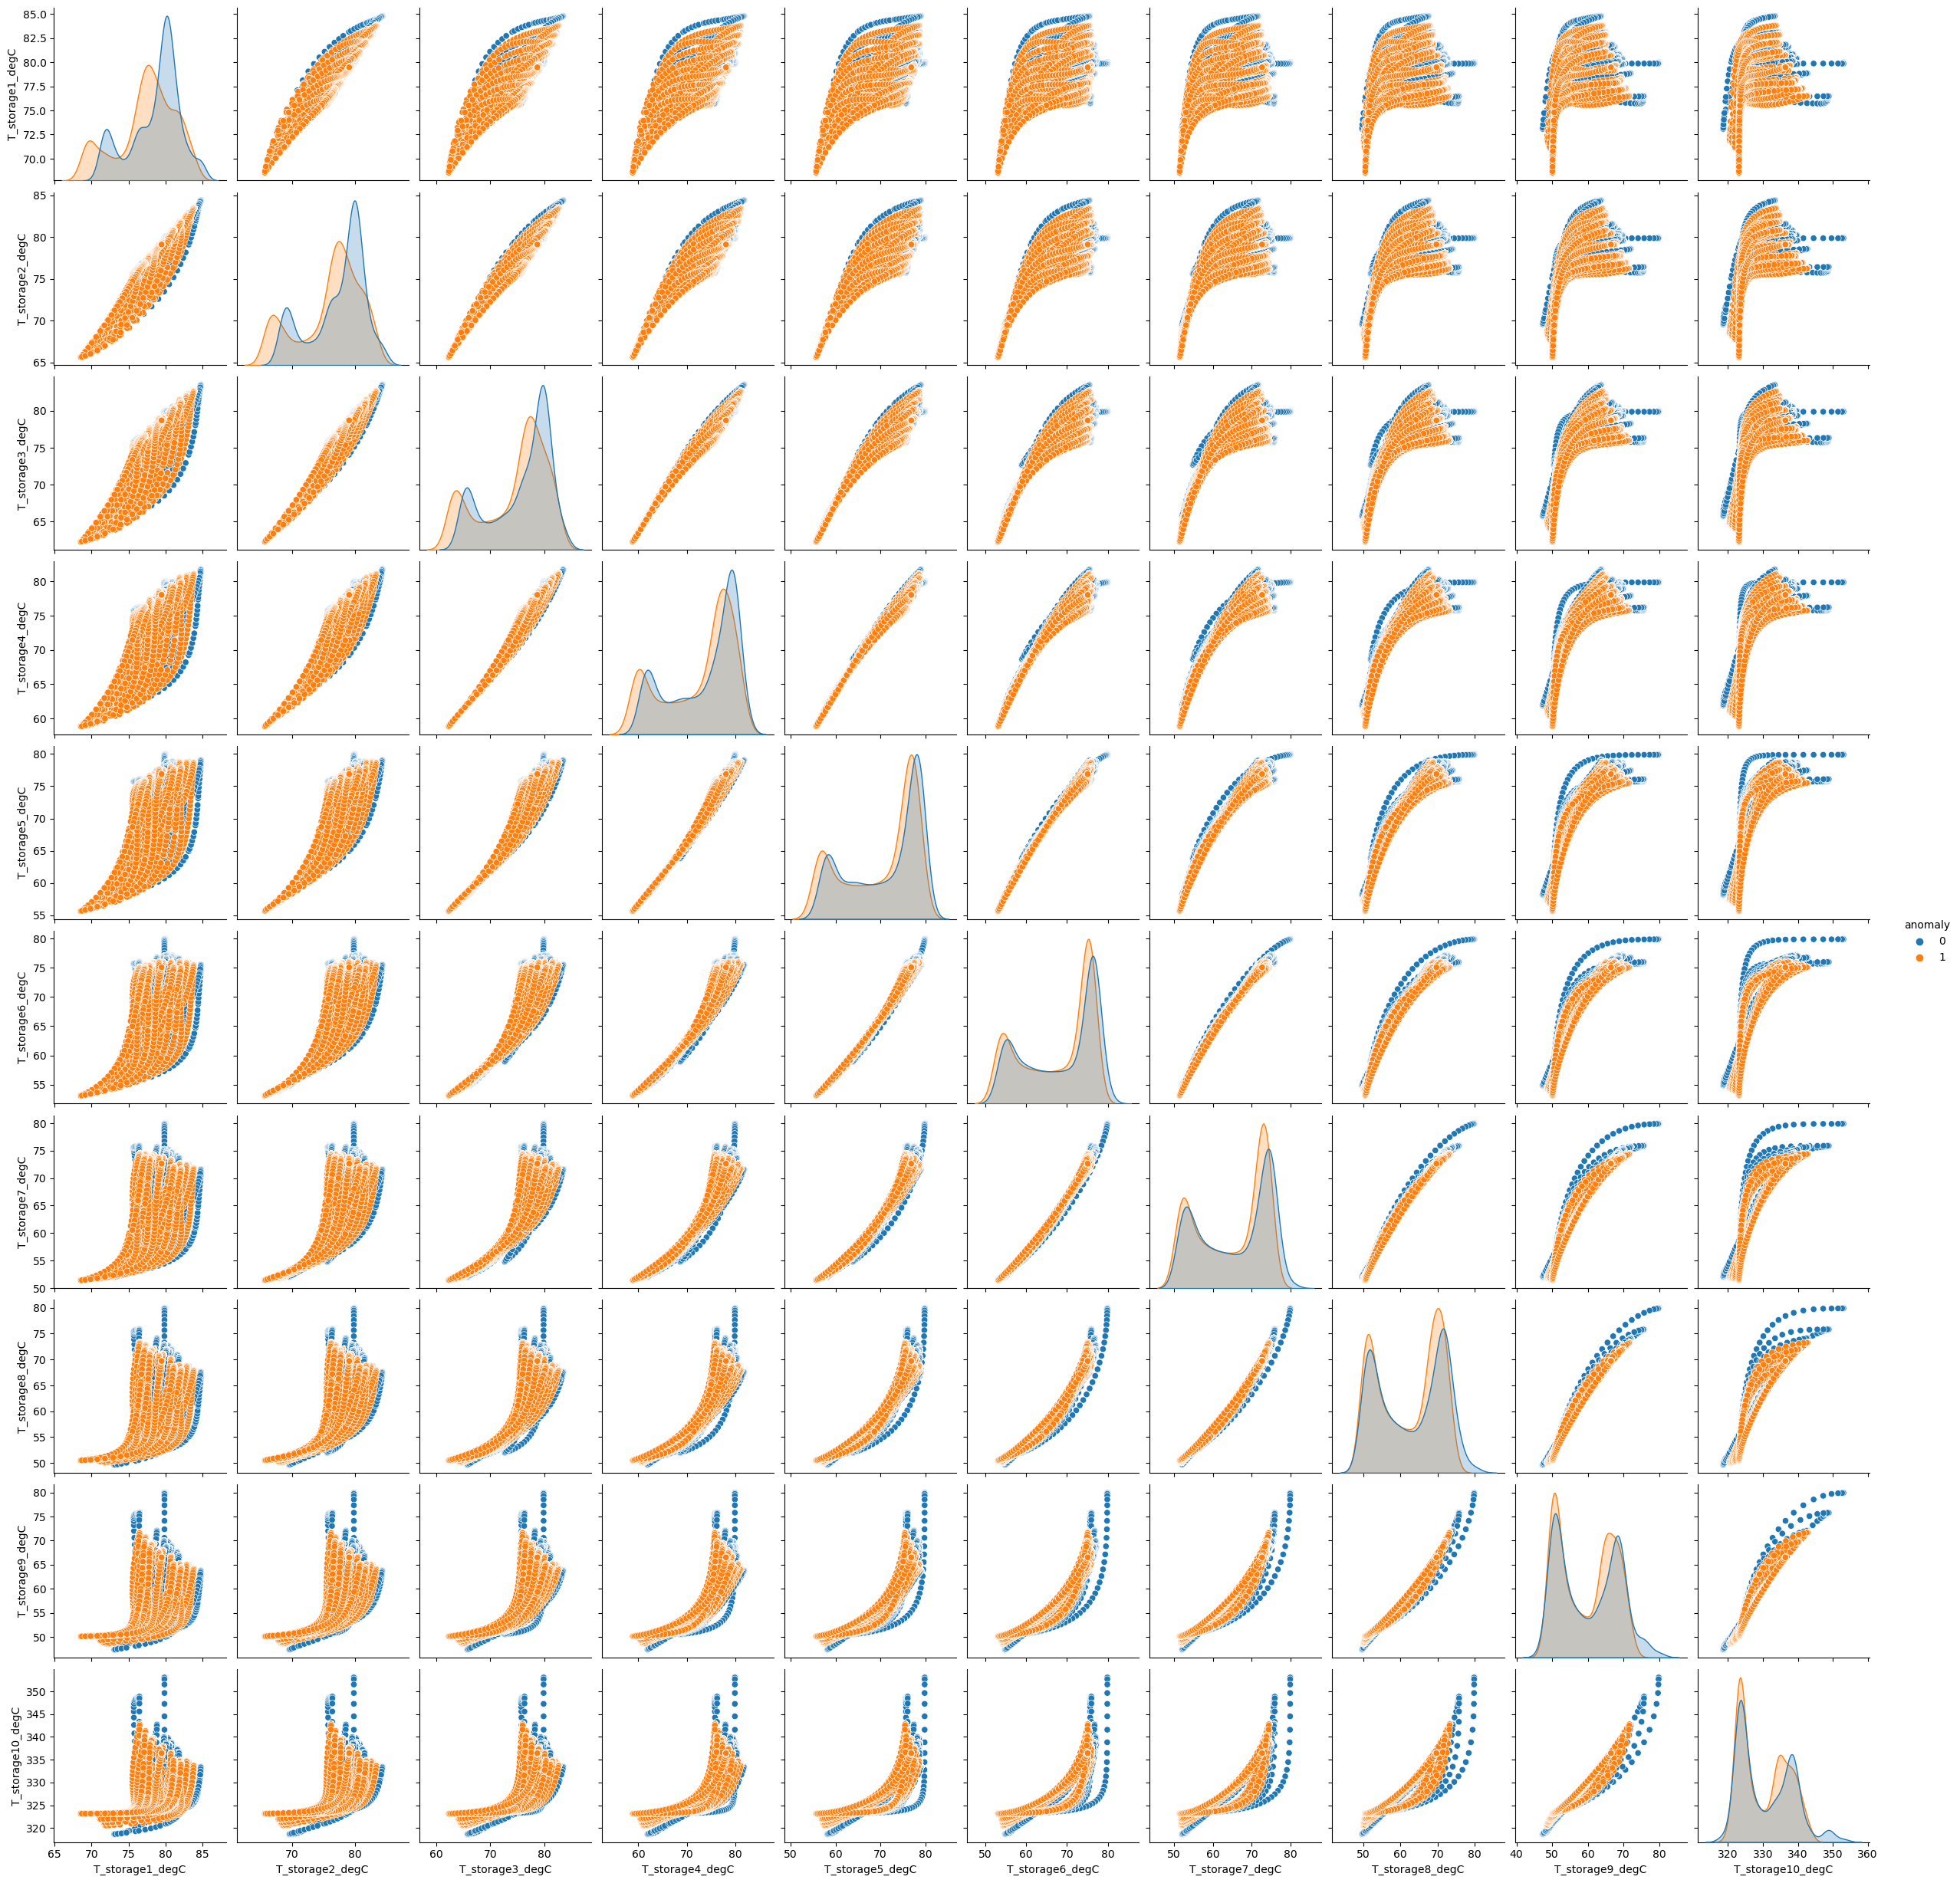

In [16]:
plt.figure(figsize=(10,10))
sns.pairplot(df_sensor,diag_kind='kde',hue='anomaly')
plt.show()

### Split Data

In [17]:
x=df.drop(['TimeDeltaIndex', 'Time_s','anomaly'],axis=1)
y=df['anomaly']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3024, 20), (1008, 20), (3024,), (1008,))

### 1. Logistic Regression

In [20]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr=accuracy_score(y_test,pred_lr)
acc_lr

0.6428571428571429

### 2. Decision Tree

In [21]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
pred_tree=tree.predict(x_test)
acc_tree=accuracy_score(y_test,pred_tree)
acc_tree

0.9375

### 3. Random Forest

In [22]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
acc_rfc=accuracy_score(y_test,pred_rfc)
acc_rfc

0.9623015873015873

### 4. SVM

In [23]:
svm=SVC()
svm.fit(x_train,y_train)
pred_svm=svm.predict(x_test)
acc_svm=accuracy_score(y_test,pred_svm)
acc_svm

0.5753968253968254

### 5. Naive Bays

In [24]:
nb=GaussianNB()
nb.fit(x_train,y_train)
pred_nb=nb.predict(x_test)
acc_nb=accuracy_score(y_test,pred_nb)
acc_nb

0.5684523809523809

### 6. AdaBoostClassifier

In [25]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
acc_abc=accuracy_score(y_test,pred_abc)
acc_abc

0.8670634920634921

### 7. GradientBoostingClassifier

In [26]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
acc_gbc=accuracy_score(y_test,pred_gbc)
acc_gbc

0.8908730158730159

### 8. XGBClassifier

In [27]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
acc_xgb=accuracy_score(y_test,pred_xgb)
acc_xgb

0.9632936507936508

### Plot the Results

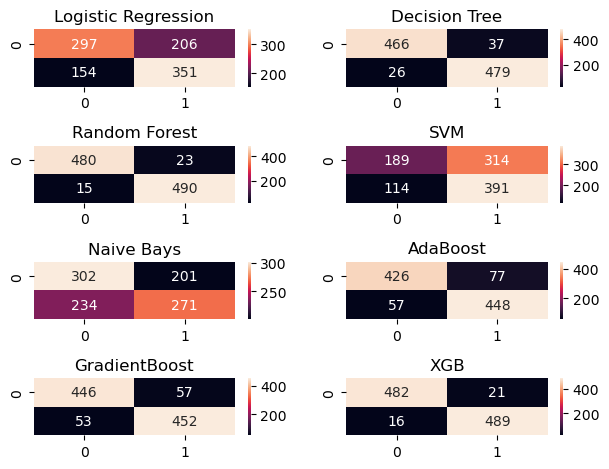

In [28]:
pred={'Logistic Regression':pred_lr,
     'Decision Tree':pred_tree,
     'Random Forest':pred_rfc,
     'SVM':pred_svm,
     'Naive Bays':pred_nb,
     'AdaBoost':pred_abc,
     'GradientBoost':pred_gbc,
     'XGB':pred_xgb}

a=1
plt.subplots_adjust(left=0.5,
                    bottom=0.5,
                    right=1,
                    top=1,
                    wspace=1,
                    hspace=1)


for i,j in pred.items():
    plt.subplot(4,2,a)
    sns.heatmap(confusion_matrix(y_test,j),annot=True,fmt="")
    a=a+1
    plt.title(i)
    
plt.tight_layout()
plt.show()

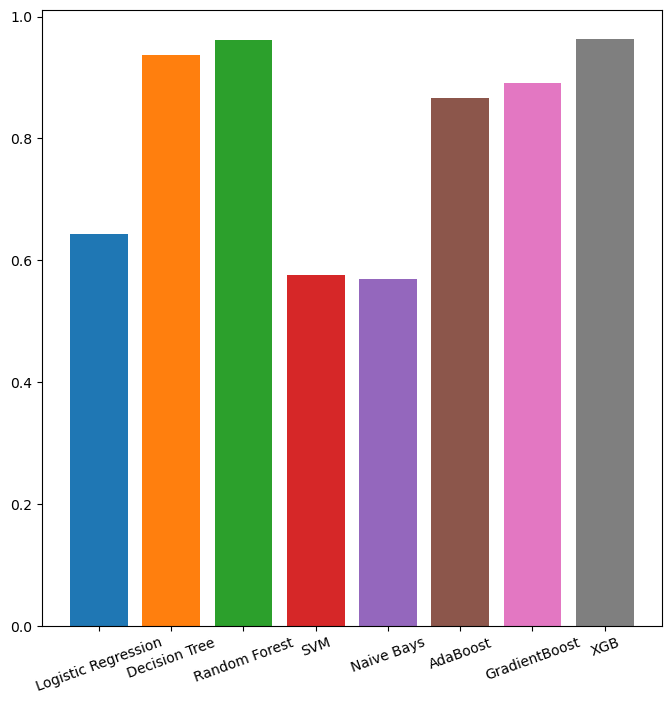

In [29]:
plt.figure(figsize=(8,8))
for i,j in pred.items():
    plt.bar(i,accuracy_score(y_test,j),align='center')
plt.xticks(rotation =20)    

plt.show()


XGB classifier gives highest accuracy score. To improve results we are applying scaling and then we will go for hyper prameer tuning

In [30]:
# sc=StandardScaler()
# x_train_sc=sc.fit_transform(x_train)
# x_train_sc=pd.DataFrame(x_train_sc,index=x_train.index,columns=x_train.columns)

# x_test_sc=sc.fit_transform(x_test)
# x_test_sc=pd.DataFrame(x_test_sc,index=x_test.index,columns=x_test.columns)

In [58]:
param={'n_estimators':[100,150,200],
       'lambda':[2,3,4],
      'eval_metric':['rmse','mae','logloss'],
      'booster':['gbtree', 'gblinear' , 'dart']}

In [59]:
xgb_grid=GridSearchCV(estimator=xgb,param_grid=param,scoring='accuracy',return_train_score=True)

In [61]:
xgb_hp=xgb_grid.fit(x_train,y_train)

In [41]:
xgb_hp.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=4, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [47]:
xgb_hp.best_score_

0.9672601390181162

as we can see hyperparameter tunning for XGBClassifier is giving almost same result as XGBClassifier with default parameters 